## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import scipy.stats as stats
import matplotlib.image as mpimg
import sklearn.feature_selection as feature_selection
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from scipy.interpolate import spline

## Load csv into pandas dataframe

In [2]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [3]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

# Feature % representation
for index, row in counts.iterrows():
    counts.loc[index] = counts.loc[index]/counts.loc[index].sum()
counts.describe()

(40000, 2579)
(40000, 28)


,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🧗🏻‍♂️,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺
count,2.722600e+04,2.722600e+04,27226.000000,27226.000000,2.722600e+04,2.722600e+04,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,...,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,27226.000000,27226.000000,2.722600e+04,27226.000000,2.722600e+04,2.722600e+04
mean,2.836262e-08,1.853382e-07,0.000004,0.000001,4.870087e-07,1.662974e-07,3.372688e-07,6.847104e-07,0.000001,4.770146e-07,...,3.034764e-07,2.123098e-07,0.000001,7.417875e-07,0.000004,0.000007,4.848792e-07,0.000001,7.395221e-07,1.958912e-07
std,4.679919e-06,2.930671e-05,0.000589,0.000101,3.824005e-05,1.959546e-05,2.310104e-05,7.042348e-05,0.000108,7.168357e-05,...,4.115603e-05,3.503176e-05,0.000146,1.045872e-04,0.000638,0.001128,8.000653e-05,0.000192,1.220234e-04,3.232264e-05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
max,7.722008e-04,4.830918e-03,0.097222,0.012594,3.984064e-03,2.583979e-03,2.403846e-03,8.474576e-03,0.013699,1.176471e-02,...,6.578947e-03,5.780347e-03,0.023438,1.694915e-02,0.105263,0.186047,1.320132e-02,0.031690,2.013423e-02,5.333333e-03


In [4]:
# Add gender column
gender_counts_df = counts 
gender_counts_df['gender'] = users['gender']
gender_counts_df = gender_counts_df.dropna()

In [5]:
gender_counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female


## Bar Chart Formatters

In [6]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Colours

In [7]:
colors_seagreen_fade=["#f3f8f3","#e8f1e8","#ddeadd","#d2e4d2","#c7ddc7","#bbd6bb","#b0d0b0","#a5c9a5","#9ac29a","#8fbc8f","#80a980","#729672","#648364","#557055","#475e47","#394b39"]

colors_orange_fade=["#fff6e5","#ffedcc","#ffe4b2","#ffdb99","#ffd27f","#ffc966","#ffc04c","#ffb732","#ffae19","#ffa500","#e59400","#cc8400","#b27300","#996300","#7f5200","#664200"]

colors_dodgeblue_fade=["#e7f1fa","#d0e3f5","#b9d5f0","#a2c7eb","#8bb9e6","#74abe1","#5d9ddc","#468fd7","#2f81d2","#1874cd","#1568b8","#135ca4","#10518f","#0e457b","#0c3a66","#092e52"]

colors_indianred_fade=["#faeeee","#f5dddd","#f0cccc","#ebbbbb","#e6aaaa","#e19999","#dc8888","#d77676","#d26666","#cd5555","#b84c4c","#a44444","#8f3b3b","#7b3333","#662a2a","#522222"]

## Emojis on Pie Chart Function

In [8]:
def pie_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    y_manual = 0.843
    loc = ax.transData.transform((1.88, y_manual))
    img_axs[0] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
    img_axs[0].imshow(io.imread("/home/stelios/Desktop/Honours Project/Emojis-usage-in-social-media-by-demographics/Jupyter/Fonts&Pics/other_less.png"))
    img_axs[0].axis("off")
    y_manual =y_manual-0.1408

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((1.88, y_manual))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
        y_manual =y_manual-0.1408
        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Emojis on Bar Chart Function

In [9]:
def bar_chart_plot_emojis(ax,fig,x,y):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]
    
    ##delete
    #a = io.imread(Emojipedia.search(x[1]).platforms[5].image_url)

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], y[i]))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")
        
        ##delete
        #img_axs[i].imshow(a)
        #img_axs[i].axis("off")

In [10]:
## CHI2 CLASS

In [11]:
class ChiSquare:
    
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha,emoji_dictionary):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT".format(colX)
            
        else:
            result="{0} is NOT an important".format(colX)
        #print("{}  {}".format(result,self.p))
        emoji_dictionary[colX]=self.p
    
    def TestIndependence(self,colX,colY,emoji_dictionary, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        #print("{} ".format(chi2))
        self._print_chisquare_result(colX,alpha,emoji_dictionary)

In [12]:
emojis_count_df = gender_counts_df.keys().drop('gender')

In [13]:
#CHI2 GENDER

In [14]:
#Initialize ChiSquare Class
cT = ChiSquare(gender_counts_df)

#Feature Selection
emoji_dict={}
for enum,emoji in enumerate (emojis_count_df):
    #print(enum)
    cT.TestIndependence(colX=emoji,colY="gender",emoji_dictionary=emoji_dict)
print("Done 1")
# Mean for males(+) - Mean for females(-)
mean_gender = gender_counts_df.loc[gender_counts_df['gender'] == 'male'].mean() - gender_counts_df.loc[gender_counts_df['gender'] == 'female'].mean()
mean_gender_dict = mean_gender.to_dict()
print("Done 2")
# Sorted by uncorrelated
sorted_by_value = sorted(emoji_dict.items(), key=lambda kv: kv[1])
print("Done 3")
# Dictionary sorted by uncorrelated emojis with gender
sorted_gender = {}
for key,value in sorted_by_value:
   # print(key)
    for key2 in mean_gender_dict:
       # print(key2)
        if(key==key2):
            if(mean_gender_dict[key2]>0):
                sorted_gender[key]='Males'
            elif(mean_gender_dict[key2]<0):
                sorted_gender[key]='Females'
            else:
                sorted_gender[key]='Same'
print("Done 4")
                
# Dataframe to plot
df_to_plot_gender = pd.DataFrame(data=sorted_by_value,columns=['Emoji','P-value'])
df_to_plot_gender['Gender'] = sorted_gender.values()
df_to_plot_gender

Done 1
Done 2
Done 3
Done 4


,Emoji,P-value,Gender
0,❤,1.322785e-07,Females
1,💕,1.383352e-07,Females
2,😍,1.568962e-06,Females
3,😘,1.195581e-04,Females
4,🤷🏽‍♂️,1.229589e-04,Males
5,🤷🏾‍♂️,1.797388e-04,Males
6,🐐,2.167578e-04,Males
7,🤦🏾‍♂️,2.259865e-04,Males
8,🤦🏽‍♂️,3.938107e-04,Males
9,🤷‍♂️,5.598107e-04,Males


In [15]:
## Plot

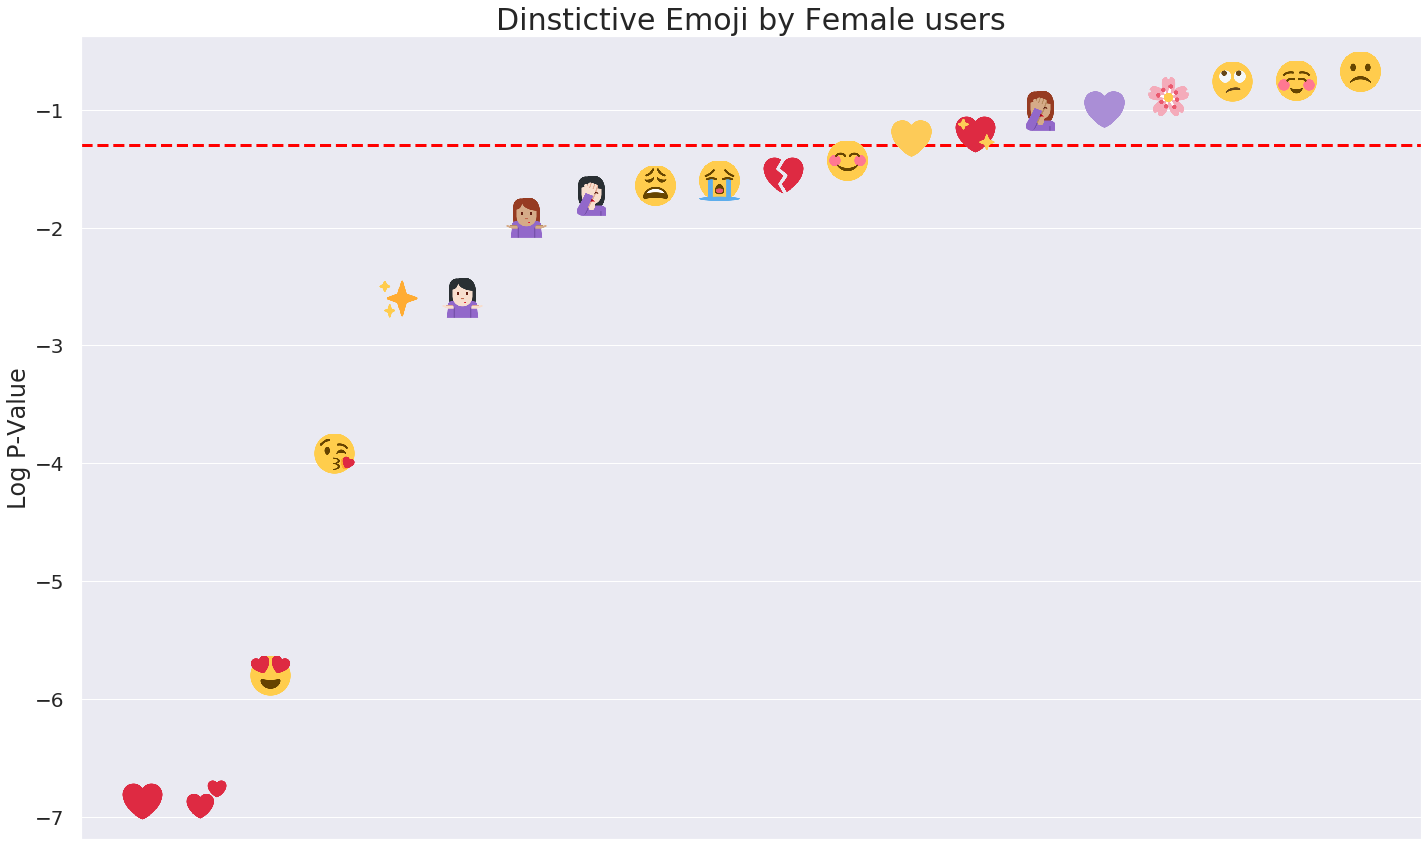

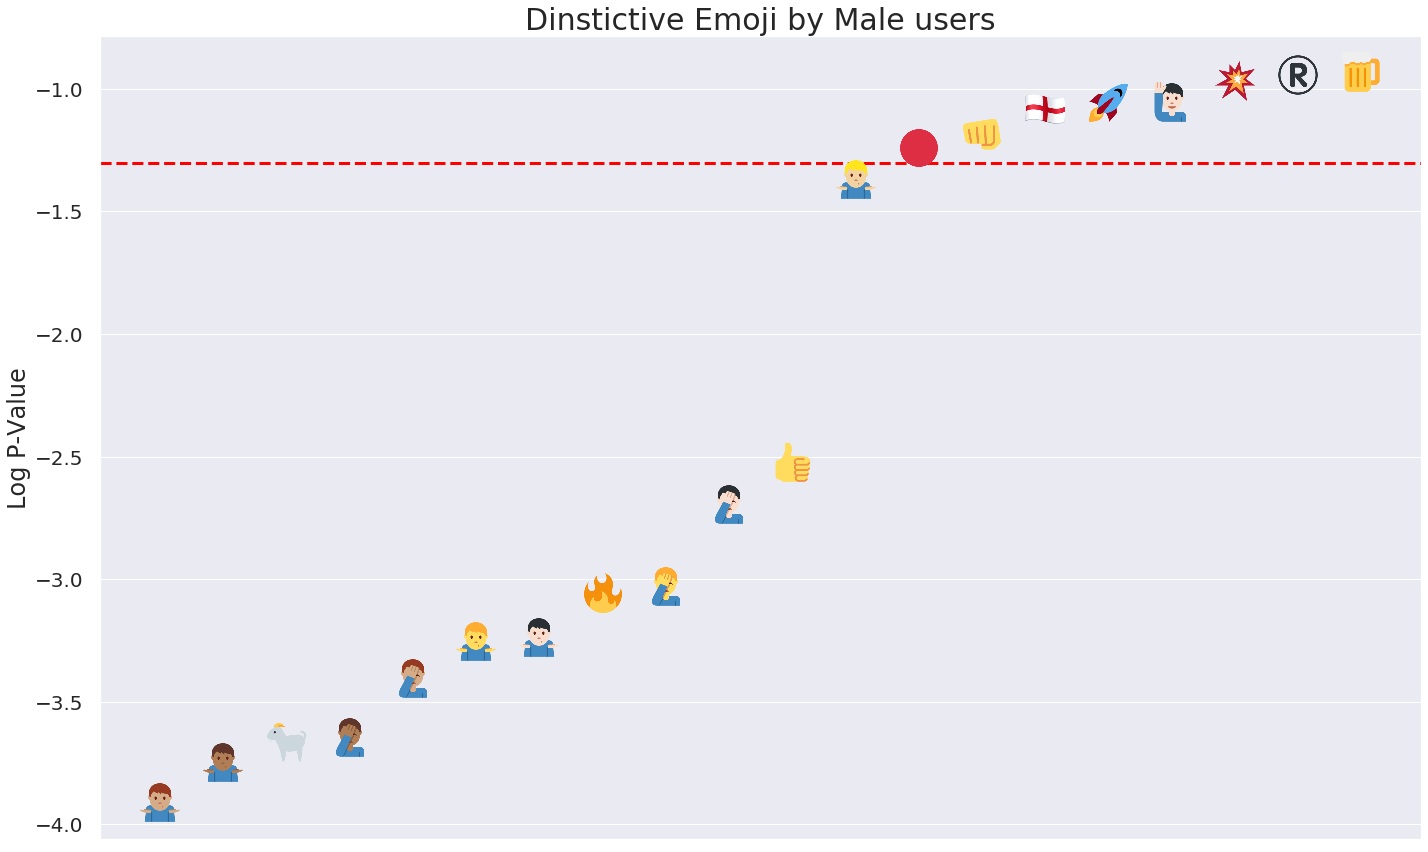

In [16]:
gender_list = ['Female','Male']
gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x=[]
    y=[]
    counter_20 = 0
    for index, row in df_to_plot_gender.iterrows():
        if(row['Gender']=='{}s'.format(gen)):
            counter_20 = counter_20 +1 
            x.append(row['Emoji'])
            y.append(math.log10(row['P-value']))
            
            if(counter_20 ==20):
                break

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=20)

    # Plot Chart
    sns.set(color_codes=True) # Seaborn 
    fig, ax = plt.subplots(figsize=(20,12))
    ax.tick_params(axis='both', which='major', pad=10)
    #ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    #plt.grid(linestyle='--', linewidth=1,axis='y')
    plt.plot(x_linespace, y,linewidth=0,color = 'grey',linestyle=':')
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Log P-Value', fontsize =24)
    plt.title('Dinstictive Emoji by {} users'.format(gender_list[ind]), fontsize =30)
    plt.tight_layout()
    
    # Change offest size
    ax.yaxis.offsetText.set_fontsize(20)
    
    # Threshold
    ax.axhline(y=-1.301,linestyle='--',color='red' ,linewidth=3)

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x,y)
    plt.show()